In [1]:
# Do not edit this cell

# course: 3654
# a: Homework 4
# d: VT

# Homework 4

**Enter your Name:**  Jordan Robey

**Enter your PID:** 905888616

I have neither given nor received unauthorized assistance on this assignment. See the course sylabus for details on the Honor Code policy. In particular, sharing lines of solution code is prohibited.

In [2]:
# Run this cell first.  Do NOT edit this cell.
Answer1 = Answer2 = Answer3 = Answer4 = Answer5 = None
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
table = pandas.read_csv('counties.csv')
table.shape

(3140, 8)

**Problem 1. (20 points)** What does the data look like? Use pandas to create a scatterplot that maps PercentCollegeGrad to X, IncomePerCapita to Y, and Population to Size of the county dots. Be careful that your Size mapping does not cause some dots to disappear with size 0. Use transparency to reveal density (hint 'alpha' parameter).  Label the axes appropriately. Display the static plot big enough to see clearly. 

Return the Axes (or AxesSubplot) object in variable Answer1. 

Think about: What interesting things do you notice in the plot?

In [3]:
table

,Name,State,Population,PercentCollegeGrad,IncomePerCapita,Employees,RetailSales,MedianRent
0,Aleutians East,AK,2305,12.9,20114,1410,6693,518
1,Aleutians West,AK,5259,14.8,20298,4321,24233,428
2,Anchorage,AK,251335,26.9,26619,93037,2612640,528
3,Bethel,AK,15525,13.1,15493,2269,59687,460
4,Bristol Bay,AK,1023,18.9,29699,392,9653,464
5,Dillingham,AK,4360,15.3,22616,1060,23077,518
6,Fairbanks North Star,AK,83374,25.2,19149,17746,702135,471
7,Haines,AK,2181,17.6,26413,371,15154,405
8,Juneau,AK,29378,30.7,26066,8369,289620,587
9,Kenai Peninsula,AK,46151,17.9,22761,8934,329438,410


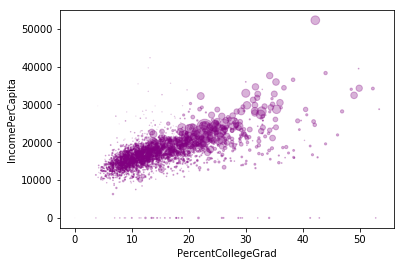

In [4]:
Answer1 = table.plot.scatter(
    x = 'PercentCollegeGrad', # x-axis
    y = 'IncomePerCapita', # y-axis
    s = table.Population/20000,   # size of the dot
    c = 'purple',
    alpha=0.3
)


**Problem 2. (20 points)** How correlated are PercentCollegeGrad and IncomePerCapita?  First, filter out the broken counties that have 0 IncomePerCapita (**use this filtered data for all the remaining problems**).  Then, compute the Pearson correlation coefficient r between PercentCollegeGrad and IncomePerCapita, which is defined as (you must use this definition; you must not use a library function for Pearson):
￼![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0)

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#For_a_sample
 
Hint: use column operations for this computation.
Return the result r as variable Answer2. 

In [5]:
filtered = table[table['IncomePerCapita'] != 0]

In [6]:
#Pearson_correlation_numerator
#X = IncomePerCapita
#Y = PercentCollegeGrad


x_bar = filtered.IncomePerCapita.mean()
y_bar = filtered.PercentCollegeGrad.mean()

list_x = []
x = 0 
for item in filtered.IncomePerCapita:
    x = (item - x_bar)
    list_x.append(x)


list_y = []
y = 0
for item in filtered.PercentCollegeGrad:
    y = (item - y_bar)
    list_y.append(y)

    
z = [list_x[i]*list_y[i] for i in range(len(list_x))]
numerator = sum(z)
numerator 

49718916.134599335

In [7]:
#Pearson_correlation_denominator
#X = IncomePerCapita
#Y = PercentCollegeGrad

list_xx = []
xx = 0 
for item in filtered.IncomePerCapita:
    xx = (item - x_bar)**2
    list_xx.append(xx)
a = (sum(list_xx))**0.5

list_yy = []
yy = 0 
for item in filtered.PercentCollegeGrad:
    yy = (item - y_bar)**2
    list_yy.append(yy)
b = (sum(list_yy))**0.5

denominator = a * b

In [8]:
Answer2 = numerator / denominator 
Answer2

0.6480384056967844

**Problem 3. (20 points)** What are the linear regression parameters? Given the potential for correlation, fit a linear regression model to the filtered data (to predict IncomePerCapita based on PercentCollegeGrad) as follows: 

> IncomePerCapita = m * PercentCollegeGrad + b
    
Hint: use the numpy.polyfit() method with degree 1, 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html .
 
Return the result in variable Answer3 as a tuple of the form (m, b).

In [9]:
#x = percent college grade
#y = income per capita
m, b = numpy.polyfit(filtered.PercentCollegeGrad, filtered.IncomePerCapita, 1 , rcond=None, full=False, w=None, cov=False)
Answer3 = (m, b)
Answer3

(382.14774542546917, 11694.79606101913)

**Problem 4. (20 points)** What is the regression error of each county?  Armed with the regression line from Problem 3, compute a new data column (called "Error") that represents an error measure for each county (in the filtered data). It should measure the distance of each county to the regression line, in the IncomePerCapita dimension. Positive error means the county's IncomePerCapita is greater than the line, negative means less than the line.

Return in variable Answer4 a DataFrame containing 3 columns (Name, State, Error) sorted by Error (from positive to negative).

Think about: Can you think of potential reasons that these particular counties are extreme (in pos and neg direction)?

In [10]:
Regression_list = []
for i in filtered.PercentCollegeGrad:
    Regression = m * i + b
    Regression_list.append(Regression)

Income_list = []
for i in filtered.IncomePerCapita:
    Income_list.append(i)
Income_list

e = [Income_list[i]-Regression_list[i] for i in range(len(Income_list))]

table = filtered.assign(Error = e)

Answer4 = table[['Name', 'State', 'Error']]
Answer4 = Answer4.sort_values(['Error'], ascending=[False])
Answer4

,Name,State,Error
2728,Sherman,TX,25633.853699
2006,New York,NY,24455.569082
2415,Sully,SD,23082.498023
1964,Esmeralda,NV,19528.363965
917,Greeley,KS,17479.121816
919,Hamilton,KS,16834.498023
2668,Loving,TX,16419.612957
2615,Hansford,TX,15054.343434
2620,Hartley,TX,14639.893354
303,Fairfield,CT,12877.751045


**Problem 5. (20 points)** What does the regression and error look like, and where does Blacksburg fit in?  Use pandas to draw a scatterplot of the above results on the filtered data. The plot should map the same axes as in Problem 1, and map the absolute value of the Error measure to the color of the dots. Use an appropriate linear colormap (hint: not a rainbow scale!) No mapping for Size. Include a color legend.  The axes should be appropriately labeled.  

Add a line to the plot that represents the regression model result. (hint: plots can be overlaid using the ax parameter of the plot functions, or use Axes.add_line()).  Label 'Montgomery, VA' clearly in the plot with its name and an arrow pointing to its dot (hint: Axes.annotate()).

Return the Axes (or AxesSubplot) object as variable Answer5.

Think about: How might you explain the position of Montgomery, VA? What additional data could be gathered to help you support your claim about Montgomery, VA?
  

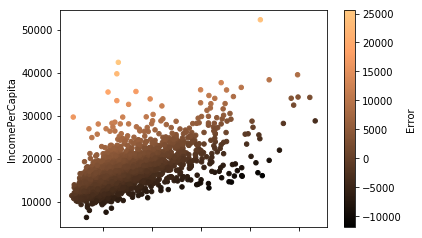

In [11]:
Answer5 = table.plot.scatter(
    x = 'PercentCollegeGrad', # x-axis
    y = 'IncomePerCapita',  # y-axis
    c = 'Error', # set the color of the dots based on the value
    colormap=plt.cm.copper, # color mapping

)
line = plt.Line2D([0, 11694], [50, 30801], color='red')
Answer5.add_line(line)
Answer5